# Milestones 1

Name        : Aan Nurliyanah

Batch       : 002



Link Dashboard : https://public.tableau.com/app/profile/nurliyanahaan/viz/Milestones_16668861503190/Dashboard3?publish=yes

# Background

Topik yang akan dibahas kali ini adalah mengenai data Bank Customer Data for Predicting Customer Churn. 
Churn rate adalah tingkat atau persentase pelanggan memutus hubungan dengan sebuah bisnis atau perusahaan pada quarter tertentu.
Dalam perbankan, hal ini ditunjukkan dengan jumlah customer yang keluar dari bank atau sudah tidak menggunakan produk layanan bank lagi. Churn rate ini penting untuk kepentingan perusahaan. Alasan utamanya adalah persentase pelanggan yang hilang tersebut sangat memengaruhi growth rate perusahaan. Sebagai analogi, jika memiliki ember berisi bunga langka. Tiba-tiba, ada lubang yang menyebabkan banyak bunga keluar. Mengisi ember tersebut agar kembali penuh dengan bunga akan memakan waktu, biaya, dan tenaga tambahan. 
Semakin tinggi tingkat churn rate semakin berpengaruh pula terhadap growth rate perusahaan. Maka dari itu dengan melihat banyak nya nasabah yang meninggalkan bank kita akan mengetahui tingkat churn rate bank tersebut.

**Problem Statement** 

Mengetahui tingkat churn rate dan menilai kondisi tingkat resiko kredit, tenure dan saldo yang terjadi di negara German, France dan Spain.

## Problem Explanation


1. Berapa jumlah customer yang ada di masing-masing negara?
2. Bagaimana jumlah customer setelah terjadinya churning ?
3. Berapa presentase churn rate yang terjadi ?
4. Di negara mana saja terjadinya churn? negara manakah dengan total churn tertinggi?
5. Bagaimana kondisi tingkat score credit di setiap negara pada saat churn terjadi 
6. Bagaimana kondisi tingkat tenure di setiap negara pada saat churn terjadi 
7. Bagaimana kondisi saldo di setiap negara pada saat churn terjadi 
8. Berapa presentase banyaknya customer yang menggunakan credit card pada saat customer churn?
9. Berapa presentase banyaknya customer yang masih aktif pada saat customer churn?
10. Berapa nilai rata rata, median, dan modus saldo pada customer yang masih existing di bank ABC ?
11. Apakah ada outlier di dataset tersebut ?
12. Apakah terdapat perbedaan nilai balance dari negara France dan Spain ?



## Working Area

### Libraries Used

Library yang saya gunakan dalam tugas ini adalah pandas, numpy, matplotlib, scipy, dan seaborn. 
Selain untuk perhitungan matematis , library yang digunakan juga untuk membantu memvisualisasikan secara sederhana dari analisis data. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Data Loading

Sumber dataset didaptkan dari kaggle dengan referensi : 
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

Dataset ini berisi data nasabah dari bank ABC Multistate dengan kolom berikut: 
-  Account Number : berisi nomor rekening nasabah
-  Credit Score : berisi nilai credit score nasabah 
-  Country of Residence : negara tenpat tinggal nasabah
-  Sex : jenis kelamin 
-  Age : umur
-  From how many years he/she is having bank acc in ABC Bank : berisi berapa lama nasabah memiliki hubungan dengan bank 
-  Account Balance  : saldo nasabah
-  Number of Product from bank : jumlah produk yang dimiliki nasabah
-  Is this customer have credit card ? : apakah nasabah memiliki kartu kredit, 1 : ada , 0 : tidak ada
-  Is he/she is active Member of bank ? : apakah nasabah adalah nasabah aktif, 1: aktif , 0 = tidak aktif
-  Salary of Account holder : jumlah gaji 
-  Churn Status : apakah nasabah sudah meninggalkan bank atau belum, 1 : sudah , 0: belum 


Memanggil dataset yang sudah disimpan dengan nama Bank_Customer _Churn_Prediction.csv, juga menggunakan fungsi na_values untuk mendeteksi missing value. Memanggil dataset teratas dengan fungsi had dan yang terbawah dengan tail. 

In [7]:
df = pd.read_csv('Bank_Customer _Churn_Prediction.csv',na_values=['?',' ','99999','N/A'])
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Data Cleaning

Mengecek missing value dengan menggunakan fungsi isnull , apakah ada data yang bernilai missing value. 

In [9]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
df.isnull().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Data sudah tidak ada missng value. 

Selanjutnya saya akan menambahkan kolom baru untuk mengelompokkan credit_score, Pengelompokan ini berdasarkan skor FICO.
Skor FICO yaitu suatu sistem penilaian terhadap risiko kredit yang merupakan sistem yang paling banyak digunakan didunia. Skor FICO ini digunakan oleh semua lembaga pelaporan konsumen yang utama di Amerika dan Kanada seperti Equifax, Experian dan TransUnion. FICO adalah merk terdaftar dari Fair Isaac Corporation. Saya akan mengelompokan ke dalam kategori berikut menggunakan fungsi looping dan if , elif, else. 

- Excellent: 800–850
- Very Good: 740–799
- Good: 670–739
- Fair: 580–669
- Poor: 300–579

In [12]:
new_columns = []
 
for i in range(len(df)):
  if df.credit_score.iloc[i] >= 800 :
    new_columns.append('Excellent')
  elif df.credit_score.iloc[i] >= 740 :
    new_columns.append('Very Good')
  elif df.credit_score.iloc[i] >= 670 :
    new_columns.append('Good')
  elif df.credit_score.iloc[i] >= 580 :
    new_columns.append('Fair')
  else:
    new_columns.append('Poor')  

df['rate_creditscore']= new_columns

Selanjutnya saya akan menambahkan kolom baru lagi untuk mengelompokan balance dinilai dari tingkat saldonya kedalam kategori berikut menggunakan fungsi looping dan if , elif, else. : 

-  High untuk saldo >= 100.000 
-  Middle untuk saldo >= 10.000
-  Low untuk saldo dibawah 10.000


In [13]:
new_columns = []
 
for i in range(len(df)):
  if df.balance.iloc[i] >= 100000 :
    new_columns.append('High')
  elif df.balance.iloc[i] >= 10000 :
    new_columns.append('Middle')
  else:
    new_columns.append('Low')  

df['rate_balance']= new_columns

Selanjutnya saya akan menambahkan kolom baru lagi untuk mengelompokan tenure dinilai dari lamanya tenure kedalam kategori berikut menggunakan fungsi looping dan if , elif, else. : 

-  Old untuk tenure >= 6 
-  Middle untuk tenure >= 3
-  Low untuk tenure dibawah 3

In [14]:
new_columns = []
 
for i in range(len(df)):
  if df.tenure.iloc[i] >= 6 :
    new_columns.append('Old')
  elif df.tenure.iloc[i] >= 3 :
    new_columns.append('Existing')
  else:
    new_columns.append('New')  

df['score_tenure']= new_columns

In [15]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,rate_creditscore,rate_balance,score_tenure
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,Low,New
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle,New
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,High,Old
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Low,New
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,High,New


Data sudah siap digunakan. 

-  Menghitung jumlah value di dalam kolom churn.

In [16]:
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Melihat negera apa saja yang ada di kolom country dan jumlah value nya. 

In [17]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

### Poin Penjabaran 

1. Berapa jumlah customer yang ada di masing-masing negara?

In [19]:
total_customer = df.groupby('country')['customer_id'].count().sort_values(ascending=False).to_frame()

total_customer

,customer_id
country,
France,5014
Germany,2509
Spain,2477


<AxesSubplot:title={'center':'Total Customer All Country'}, xlabel='country', ylabel='total_customer'>

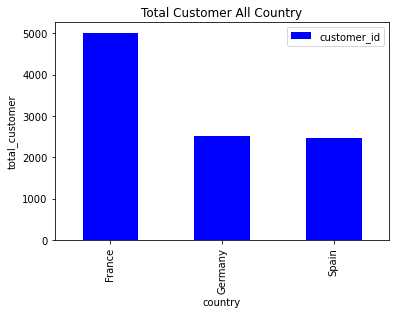

In [20]:
total_customer.plot(kind='bar', xlabel = 'country', ylabel = 'total_customer', title = 'Total Customer All Country', color = 'blue')

Dari data diatas didapatkan jumlah customer terbanyak ada di negara France yaitu sebesar 5014, negara kedua Germany sebesar 2509, negara terakhir yaitu Spain dengan total 2477. 

2. Bagaimana jumlah customer setelah terjadinya churning ?

In [21]:
existing = df[(df['churn'] == 0)]

In [22]:
total_existing= existing.groupby(['country'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
total_existing

,customer_id
country,
France,4204
Spain,2064
Germany,1695


<AxesSubplot:title={'center':'Total Customer Existing All Country'}, xlabel='country', ylabel='total_customer'>

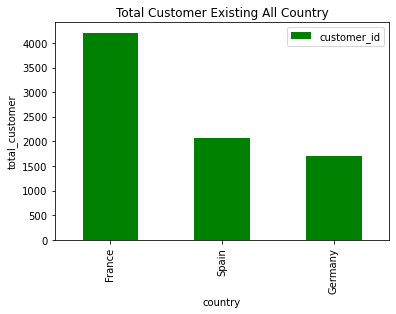

In [23]:
total_existing.plot(kind='bar', xlabel = 'country', ylabel = 'total_customer', title = 'Total Customer Existing All Country', color = 'green')

Setelah adanya churning atau keluar nya nasabah, jumlah customer existing saat ini masih dengan tertinggi yaitu France dengan total 4204, negara kedua Spain sebesar 2064, negara terakhir yaitu Germany dengan total 1695. Hal ini menunjukan bahwa negara Germany mengalami penurunan yang lumayan banyak sehingga saat ini posisisinya ada di posisi terakhir. 

3. Berapa presentase churn rate yang terjadi ?

Dengan melihat pengurangan data diatas, kita akan menghitung berapa presentase nilai churn rate secara keseluruhan 

In [24]:
total_stay = (df[df['churn']== 0 ]).churn.count()
total_stay

7963

In [25]:
total = df.churn.count()
total

10000

In [26]:
churn_rate = (total-total_stay)/total *100
churn_rate

20.369999999999997

Total Churn Rate sebesar 20.37 % secara keseluruhan. Dapat diasumsikan tingkat churn rate ini lumayan besar dan dapat mempengaruhi Growth Rate bank ABC Multistate . Perlu diketahui bahwa, acuan churn rate berbeda di tiap jenis bisnis. Pada perusahaan dengan bisnis Saas, angka churn rate yang standar itu ada di angka 6.19%, bidang pendidikan di angka 10.52%, OTT 11,85%, consumer good 7.19% dan media entertainment di angka 6.17%. 
 

4. Di negara mana saja terjadinya churn? negara manakah dengan total churn tertinggi?

In [27]:
lost = df[(df['churn'] == 1)]

In [28]:
total_lost= lost.groupby(['country'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
total_lost

,customer_id
country,
Germany,814
France,810
Spain,413


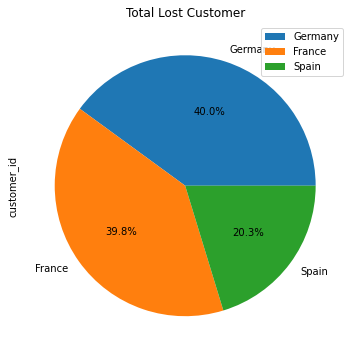

In [29]:
total_lost = total_lost.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))
plt.title("Total Lost Customer")
plt.show()

Dari data diatas didapatkan bahwa churn terjadi di ketiga negara yaitu France, Germany dan Spain.  Untuk tingkat churn di negara Germany adalah yang paling tinggi diantara negara lain. Meskipun hanya berbeda 0.2 % dari France namun karena jumlah nasabah Germany lebih sedikit dari pada France sehingga Germany terlihat kehilangan banyak customer.  

5. Bagaimana kondisi tingkat score credit di setiap negara pada saat churn terjadi 

-  Negara Germany

In [30]:
German = df[(df['churn'] == 1) & (df['country'] == 'Germany')]

In [31]:
gcreditscore = German.groupby(['rate_creditscore'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
gcreditscore

,customer_id
rate_creditscore,
Fair,276
Poor,204
Good,171
Very Good,111
Excellent,52


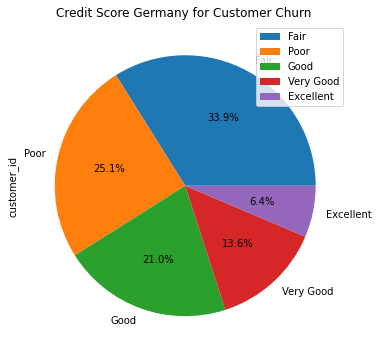

In [32]:
gcreditscore = gcreditscore.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))
plt.title("Credit Score Germany for Customer Churn ")
plt.show()


In [33]:
German.to_csv('german.csv', index= False)

Status credit terbanyak di Germany adalah status Fair. Untuk mengingatkan kembali kategori score credit : 
- Excellent: 800–850
- Very Good: 740–799
- Good: 670–739
- Fair: 580–669
- Poor: 300–579

Dapat diasumsikan bahwa nasabah yang churn di Germany memiliki resiko kredit yang kecil dimana jumlah fair lebih banyak dibandingkan dengan ke 4 lainnya. credit scoring adalah metode yang digunakan oleh perbankan dalam menentukan layak atau tidaknya peminjam untuk mendapatkan pinjaman. Artinya semakin bagus untuk bank karena semakin tinggi tingkat score creditnya semakin baik untuk bank, tingkat customer yang score nya tinggi tidak banyak yang keluar dari bank.  Skor kredit yang bagus adalah skor kredit yang tinggi dan menunjukkan bahwa customer termasuk dalam kategori risiko rendah.

-  Negara France 

In [34]:
France = df[(df['churn'] == 1) & (df['country'] == 'France')]

In [35]:
fcreditscore = France.groupby(['rate_creditscore'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
fcreditscore

,customer_id
rate_creditscore,
Fair,262
Poor,217
Good,189
Very Good,92
Excellent,50


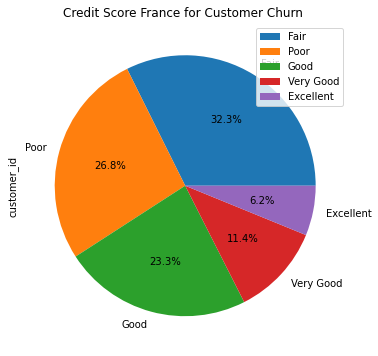

In [36]:
fcreditscore = fcreditscore.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))
plt.title("Credit Score France for Customer Churn ")
plt.show()

Status credit terbanyak di France adalah status Fair. Dapat diasumsikan bahwa nasabah yang churn di France memiliki resiko kredit yang kecil dimana jumlah fair lebih banyak dibandingkan dengan ke 4 lainnya. Artinya tidak masalah apabila nasabah meninggalkan bank dengan score kredit yang kecil. 

-  Negara Spain 

In [37]:
Spain = df[(df['churn'] == 1) & (df['country'] == 'Spain')]

In [38]:
screditscore = Spain.groupby(['rate_creditscore'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
screditscore

,customer_id
rate_creditscore,
Fair,147
Poor,99
Good,92
Very Good,49
Excellent,26


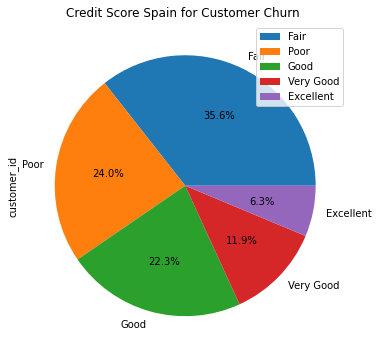

In [39]:
screditscore = screditscore.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))
plt.title("Credit Score Spain for Customer Churn ")
plt.show()

Status credit terbanyak di Spain adalah status Fair. Dapat diasumsikan bahwa nasabah yang churn di Spain memiliki resiko kredit yang kecil dimana jumlah fair lebih banyak dibandingkan dengan ke 4 lainnya. Artinya tidak masalah apabila nasabah meninggalkan bank dengan score kredit yang kecil. 

6. Bagaimana kondisi tingkat tenure di setiap negara pada saat churn terjadi 

Germany 

In [40]:
gtenure = German.groupby(['score_tenure'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
gtenure

,customer_id
score_tenure,
Old,359
Existing,250
New,205


France

In [41]:
ftenure = France.groupby(['score_tenure'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
ftenure

,customer_id
score_tenure,
Old,358
Existing,244
New,208


Spain 

In [42]:
stenure = Spain.groupby(['score_tenure'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
stenure

,customer_id
score_tenure,
Old,167
Existing,131
New,115


In [43]:
total_tenure = pd.concat([gtenure,ftenure, stenure], axis=1)
total_tenure.columns = ['German', 'France', 'Spain']
total_tenure = total_tenure.reset_index()
total_tenure

,score_tenure,German,France,Spain
0,Old,359,358,167
1,Existing,250,244,131
2,New,205,208,115


In [44]:
total_tenure = pd.melt(total_tenure, id_vars=['score_tenure'], value_vars= ['German', 'France', 'Spain'])
total_tenure

,score_tenure,variable,value
0,Old,German,359
1,Existing,German,250
2,New,German,205
3,Old,France,358
4,Existing,France,244
5,New,France,208
6,Old,Spain,167
7,Existing,Spain,131
8,New,Spain,115


<AxesSubplot:xlabel='score_tenure', ylabel='value'>

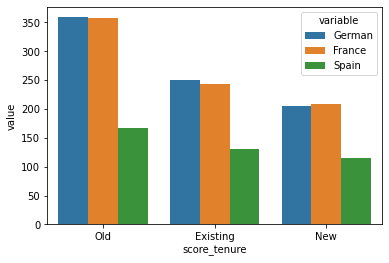

In [45]:
sns.barplot(data=total_tenure, x='score_tenure', y='value', hue='variable')

Dari data diatas didapatkan bahwa customer yang sudah lama berhubungan dengan bank dengan kategori Old menempati posisi yang tertinggi. Untuk kategori tenure diingatkan kembali : 
-  Old untuk tenure >= 6 
-  Middle untuk tenure >= 3
-  Low untuk tenure dibawah 3
Dapat diasumsikan bahwa customer yang meninggalkan bank di ketiga negera tersebut adalah paling banyak kategori  customer yang sudah diatas 6 tahun menjadi customer. 

7. Bagaimana kondisi saldo di setiap negara pada saat churn terjadi 

Germany 

In [46]:
gbalance = German.groupby(['rate_balance'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
gbalance

,customer_id
rate_balance,
High,706
Middle,108


France

In [47]:
fbalance = France.groupby(['rate_balance'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
fbalance

,customer_id
rate_balance,
High,343
Low,338
Middle,129


Spain

In [48]:
sbalance = Spain.groupby(['rate_balance'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
sbalance

,customer_id
rate_balance,
Low,163
High,162
Middle,88


In [49]:
total_balance = pd.concat([gbalance,fbalance, sbalance], axis=1)
total_balance.columns = ['German', 'France', 'Spain']
total_balance = total_balance.reset_index()
total_balance

,rate_balance,German,France,Spain
0,High,706.0,343,162
1,Middle,108.0,129,88
2,Low,NaN,338,163


In [50]:
total_balance = pd.melt(total_balance, id_vars=['rate_balance'], value_vars= ['German', 'France', 'Spain'])
total_balance

,rate_balance,variable,value
0,High,German,706.0
1,Middle,German,108.0
2,Low,German,NaN
3,High,France,343.0
4,Middle,France,129.0
5,Low,France,338.0
6,High,Spain,162.0
7,Middle,Spain,88.0
8,Low,Spain,163.0


<AxesSubplot:xlabel='rate_balance', ylabel='value'>

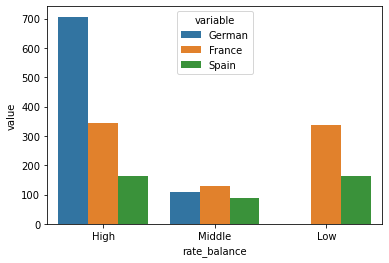

In [51]:
sns.barplot(data=total_balance, x='rate_balance', y='value', hue='variable')

Dari data diatas didapatkan bahwa jumlah saldo di ketiga negara bervariasi, kategori digolongkan menjadi :
-  High untuk saldo >= 100.000 
-  Middle untuk saldo >= 10.000
-  Low untuk saldo dibawah 10.000

Untuk German jumlah terbanyak customer yang meninggalkan bank adalah dengan jumlah saldo kategori high. 
Untuk France jumlah terbanyak customer yang meninggalkan bank adalah dengan jumlah saldo kategori low.
Untuk Spain jumlah terbanyak customer yang meninggalkan bank adalah dengan jumlah saldo kategori low. 

Sangat disayangkan untuk German karena kategori nasabah yang paling banyak keluar adalah kategoru dengan saldo yang tinggi. 

8. Berapa presentase banyaknya customer yang menggunakan credit card pada saat customer churn?

In [52]:
cc = df[(df['credit_card'] == 1) & (df['churn'] == 1)]

In [53]:
cc_total= cc.groupby(['country'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
cc_total

,customer_id
country,
Germany,577
France,569
Spain,278


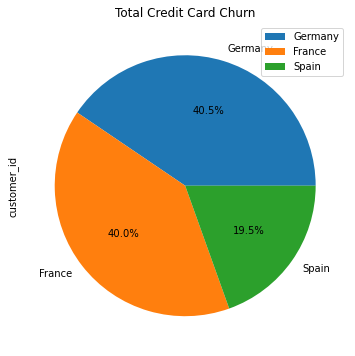

In [54]:
cc_plot = cc_total.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))
plt.title("Total Credit Card Churn")
plt.show()

Dari data diatas didapatkan total terbanyak nasabah yang masih memiliki kartu kredit pada saat churn adalah di negara German dengan proporsi 40,5 %. 


9. Berapa presentase banyaknya customer yang masih aktif pada saat customer churn?

In [55]:
aktif = df[(df['active_member'] == 1) & (df['churn'] == 1)]

In [56]:
aktif_total= aktif.groupby(['country'])[['customer_id']].count().sort_values(by= 'customer_id',ascending=False)
aktif_total

,customer_id
country,
France,298
Germany,296
Spain,141


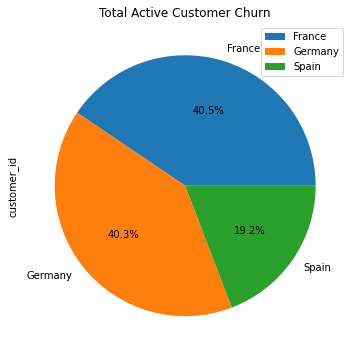

In [57]:
aktif_plot = aktif_total.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))
plt.title("Total Active Customer Churn")
plt.show()


Dari data diatas didapatkan total aktif customer terbanyak adalah di negara France. 

Statistik Deskriptif


10. Berapa nilai rata rata, median, dan modus saldo pada customer yang masih existing di bank ABC ?

In [58]:
customer_exist = df[(df['churn']== 0)]

Untuk nilai central tendency di masing-masing negara sebagai berikut :

In [59]:
customer_exist.groupby('country')['balance'].agg(['mean','median','min','max','std']).sort_values(by = 'mean',ascending=False)

,mean,median,min,max,std
country,,,,,
Germany,119427.106696,120252.02,27288.43,214346.96,29966.032167
France,60339.275678,49853.57,0.00,212778.20,63446.323423
Spain,59678.070470,0.00,0.00,221532.80,63489.039682


In [60]:
customer_exist['balance'].mode()[0]

0.0

Untuk nilai central tendency pada customer yang masih existing di bank ABC dihitung dari banyak saldo customer adalah:

In [61]:
print ('Mean: ' + str(customer_exist['balance'].mean()))
print ('Median: ' + str(customer_exist['balance'].median()))
print ('Mode: ' + str(customer_exist['balance'].mode()[0]))
print ('Std: ' + str(customer_exist['balance'].std()))
print ('Min: ' + str(customer_exist['balance'].min()))
print ('Max: ' + str(customer_exist['balance'].max()))

Mean: 72745.29677885193
Median: 92072.68
Mode: 0.0
Std: 62848.04070061753
Min: 0.0
Max: 221532.8


Hasil perhitungan Central Tendency di bank ABC sbb :

- Mean: 72745.29677885193
- Median: 92072.68
- Mode: 0.0

11. Apakah ada outlier di dataset tersebut

In [62]:
print(customer_exist['balance'].skew())

-0.04688735375712353


Dari hasil perhitungan skew diatas diketahui :
- Dengan kondisi jika nilai skewness = 0 , maka distribusi data benar-benar simetris / normal distribution.
- Jika skewness diantara -0.5 dan 0.5 maka data fairly symmetrical.
- Jika skewness diantara -1 dan –0.5 atau antara 0.5 dan 1 maka data moderately skewed.
- Jika skewness kurang dari -1 atau lebih 1 maka data highly skewed.

Nilai skewness : -0.04688735375712353 artinya data fairly symmetrical, bisa diasumsikan bahwa dataset tersebut termasuk Distribusi normal. 
Mari kita lihat dari visualisasi plot berikut untuk lebih detailnya. 

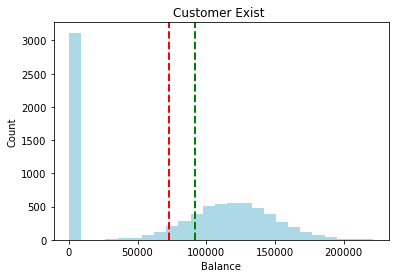

In [63]:
customerexist = customer_exist['balance']
customerexist.plot.hist(title='Customer Exist ', color='lightblue', bins=25)
plt.xlabel('Balance')
plt.ylabel('Count')  
plt.axvline(customerexist.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(customerexist.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

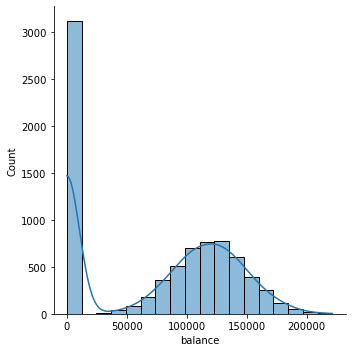

In [64]:
sns.displot(customer_exist.balance, kde=True, label='Customer Exist')

Visualisasi boxplot juga agar terlihat lebih jelas outlier nya apakah ada atau tidak. 

<AxesSubplot:ylabel='balance'>

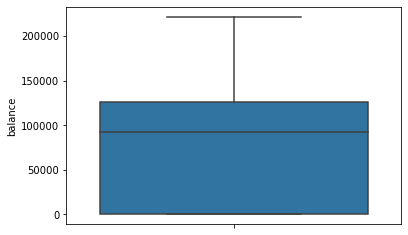

In [65]:
sns.boxplot(data=customer_exist, y='balance')

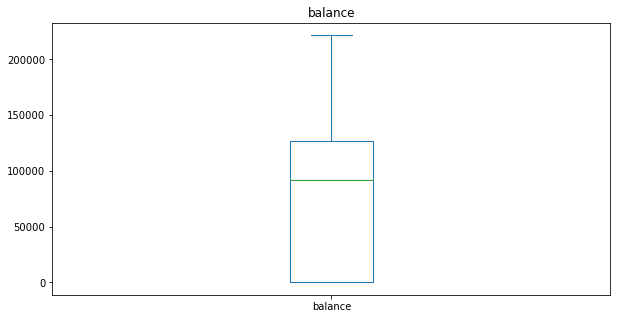

In [66]:
customer_exist['balance'].plot(kind='box', title='balance', figsize=(10,5))
plt.show()

In [67]:
dfexist = customer_exist.copy()

karena distribusi normal maka digunakan perhitungan z-score.

In [68]:
dfexist['Z-Score'] = stats.zscore(dfexist['balance'])
dfexist.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,rate_creditscore,rate_balance,score_tenure,Z-Score
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle,New,0.176032
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Low,New,-1.157552
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,High,New,0.839626
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Excellent,Low,Old,-1.157552
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Poor,High,Existing,1.102821


In [69]:
dfexist[(dfexist['Z-Score']>3)| (dfexist['Z-Score']<-3)]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,rate_creditscore,rate_balance,score_tenure,Z-Score


Dari analisis diatas diasumsikan bahwa tidak terdapat outlier. 

12. Apakah terdapat perbedaan nilai balance dari negara France dan Spain ?

Hypothesis testing T-Test 2 Sample 2 Tailed

**H0: μ_france = μ_spain**

**H1: μ_france != μ_spain**

In [70]:
Balance_france = customer_exist[(customer_exist['country'] == 'France')]
Balance_spain = customer_exist[(customer_exist['country'] == 'Spain')]



In [71]:
print('Average balance of France a day: ${}'.format(np.round(Balance_france.balance.mean())))
print('Average balance of Germany a day: ${}'.format(np.round(Balance_spain.balance.mean())))

Average balance of France a day: $60339.0
Average balance of Germany a day: $59678.0


In [72]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(Balance_france['balance'], Balance_spain['balance'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.6982780263703305
t-statistics: 0.38766378572067645


-64013.233183475306
184691.78453932705


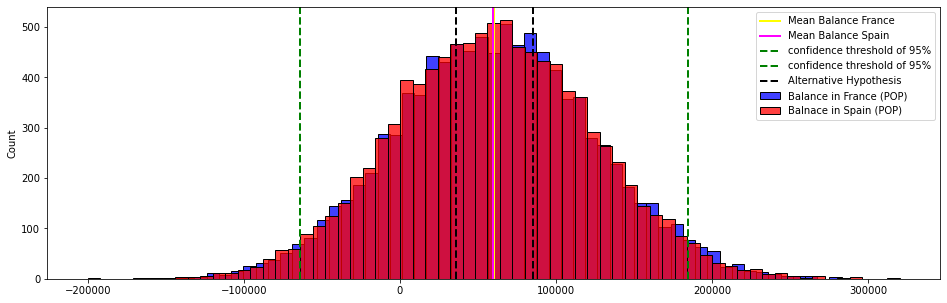

In [73]:
# simulation
h0_pop = np.random.normal(Balance_france['balance'].mean(),Balance_france['balance'].std(),10000)
h1_pop = np.random.normal(Balance_spain['balance'].mean(),Balance_spain['balance'].std(),10000)

ci = stats.norm.interval(0.95, Balance_france['balance'].mean(), Balance_france['balance'].std())

plt.figure(figsize=(16,5))
sns.histplot(h0_pop, label='Balance in France (POP)',color='blue')
sns.histplot(h1_pop, label='Balnace in Spain (POP)',color='red')

# mean
plt.axvline(Balance_france['balance'].mean(), color='yellow', linewidth=2, label='Mean Balance France')
plt.axvline(Balance_spain['balance'].mean(), color='magenta',  linewidth=2, label='Mean Balance Spain')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(h0_pop.mean()+t_stat*h0_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(h0_pop.mean()-t_stat*h0_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])
print(ci[1])

Dari perhitungan diatas didapatkan bahwa P-value: 0.6982780263703305 artinya h0 failed to reject . Dapat kita asumsikan bahwa tidak terdapat perbedaan yang signifikan antara nilai balance dari negara France dan Spain. 

## Conclusions, Assumptions, Overall Analysis

Dari analisis yang sudah dilakukan di dataset Bank Customer ABC Multistate didapatkan kesimpulan sbb : 

-  Jumlah customer terbanyak ada di negara France yaitu sebesar 5014, negara kedua Germany sebesar 2509, negara terakhir yaitu Spain dengan total 2477. 
-  Setelah adanya churning atau keluar nya nasabah, jumlah customer existing saat ini masih dengan tertinggi yaitu France dengan total 4204, negara kedua Spain sebesar 2064, negara terakhir yaitu Germany dengan total 1695. Hal ini menunjukan bahwa negara Germany mengalami penurunan yang lumayan banyak sehingga saat ini posisisinya ada di posisi terakhir. 
-  Total Churn Rate sebesar 20.37 % secara keseluruhan. Dapat diasumsikan tingkat churn rate ini lumayan besar dan dapat mempengaruhi Growth Rate bank ABC Multistate .  
-  Churn terjadi di ketiga negara yaitu France, Germany dan Spain.  Untuk tingkat churn di negara Germany adalah yang paling tinggi diantara negara lain. Meskipun hanya berbeda 0.2 % dari France namun karena jumlah nasabah Germany lebih sedikit dari pada France sehingga Germany terlihat kehilangan banyak customer. 
- Status credit terbanyak di Germany, Spain, dan France adalah status Fair.
Dapat diasumsikan bahwa nasabah yang churn di Germany memiliki resiko kredit yang kecil dimana jumlah fair lebih banyak dibandingkan dengan ke 4 lainnya. credit scoring adalah metode yang digunakan oleh perbankan dalam menentukan layak atau tidaknya peminjam untuk mendapatkan pinjaman. Artinya semakin bagus untuk bank karena semakin tinggi tingkat score creditnya semakin baik untuk bank, tingkat customer yang score nya tinggi tidak banyak yang keluar dari bank.  Skor kredit yang bagus adalah skor kredit yang tinggi dan menunjukkan bahwa customer termasuk dalam kategori risiko rendah. Artinya tidak masalah apabila nasabah meninggalkan bank dengan score kredit yang kecil. 
-  Dari data diatas didapatkan bahwa customer yang sudah lama berhubungan dengan bank dengan kategori Old menempati posisi yang tertinggi. Dapat diasumsikan bahwa customer yang meninggalkan bank di ketiga negera tersebut adalah paling banyak kategori  customer yang sudah diatas 6 tahun menjadi customer. 
-  Didapatkan bahwa jumlah saldo di ketiga negara bervariasi, kategori digolongkan menjadi :
Untuk German jumlah terbanyak customer yang meninggalkan bank adalah dengan jumlah saldo kategori high. 
Untuk France jumlah terbanyak customer yang meninggalkan bank adalah dengan jumlah saldo kategori low.
Untuk Spain jumlah terbanyak customer yang meninggalkan bank adalah dengan jumlah saldo kategori low. 
-  Total terbanyak nasabah yang masih memiliki kartu kredit pada saat churn adalah di negara German dengan proporsi 40,5 %. 
-  Total aktif customer terbanyak adalah di negara France. 
-  Hasil perhitungan Central Tendency di bank ABC sbb :
    - Mean: 72745.29677885193
    - Median: 92072.68
    - Mode: 0.0
-  Dari analisis diasumsikan bahwa tidak terdapat outlier. 
-  Untuk uji hipotesis didapatkan Nilai P-value: 0.6982780263703305 artinya h0 failed to reject .
dari kedua negara yang dibandingkan yaitu negara France dan Spain yang masuk dalam 2 kategori negara yang jumlah existing customer nya terbanyak, dapat kita asumsikan bahwa tidak terdapat perbedaan yang signifikan antara nilai balance dari negara France dan Spain. 




Dataframe yang digunakan untuk tableu

In [74]:
df.to_csv('data_bank.csv', index= False)